## Model description

https://easychair.org/publications/paper/1ff2

Three-dimensional ODE of the plant without discrete-time PI-controller:

$$
   \left\{ \begin{array}{lcl}
   \dot{I} & = & \frac{1}{L}\cdot\left( \left(K_P\cdot\left(x_0-x\right)+K_I\cdot x_c \right) - I\cdot\left(R - \frac{K^2}{d_{rot}}\right)\right) \\
   \dot{x} & = & \frac{K}{i\cdot d_{rot}}\cdot I \\
   \dot{x_c} & = & x_0-x \end{array}
   \right.
$$

In [1]:
#] add LazySets#v1.25.0

In [2]:
#] add https://github.com/JuliaReach/Reachability.jl.git#mforets/no_logger

In [3]:
using Reachability ,TaylorIntegration, MathematicalSystems

In [4]:
@taylorize function EMBrake!(du, u, p, t)
    local L    = 1.e-3
    local KP   = 10000.
    local KI   = 1000.
    local x0   = 0.05
    local R    = 0.3
    local K    = 0.02
    local drot = 0.1
    local i    = 113.1167
    
    du[1] = 1/L * (KP * (x0-u[2]) + KI * u[3] - u[1] * (R + K^2/drot))
    du[2] = u[1] * K/i/drot
    du[3] = x0 - u[2]

    return du
end

## Reachability settings

In [5]:
I₀  = Interval(0., 0.)
x₀  = Interval(0., 0.)
xc₀ = Interval(0., 0.)

X₀ = I₀ × x₀ × xc₀

CartesianProduct{Float64,CartesianProduct{Float64,Interval{Float64,IntervalArithmetic.Interval{Float64}},Interval{Float64,IntervalArithmetic.Interval{Float64}}},Interval{Float64,IntervalArithmetic.Interval{Float64}}}(CartesianProduct{Float64,Interval{Float64,IntervalArithmetic.Interval{Float64}},Interval{Float64,IntervalArithmetic.Interval{Float64}}}(Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 0]), Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 0])), Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 0]))

In [6]:
S = BlackBoxContinuousSystem(EMBrake!, 3)
P = InitialValueProblem(S, X₀);

## Results

In [7]:
sol = solve(P, Options(:T=>0.2),
            op=TMJets(Options(:max_steps=>10_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

Reachable States Computation...
elapsed time: 7.868e+00 seconds


In [8]:
#using Pkg
#Pkg.add("LaTeXStrings")
using Plots, LaTeXStrings

### I vs $x_c$

In [9]:
Xk_13 = [project(sol.Xk[i].X, [1, 3], LazySets.LinearMap) for i in eachindex(sol.Xk)];

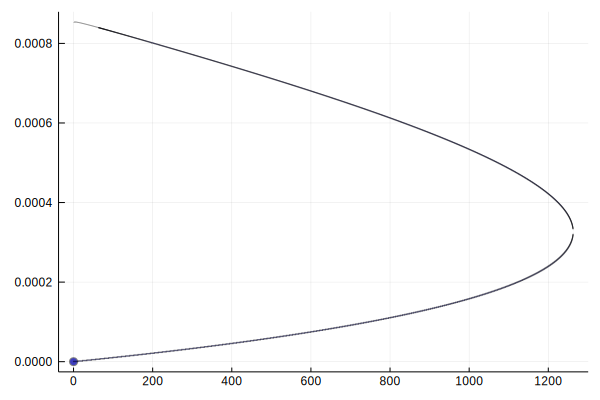

In [10]:
plot(Xk_13, color=:blue)

### I vs t

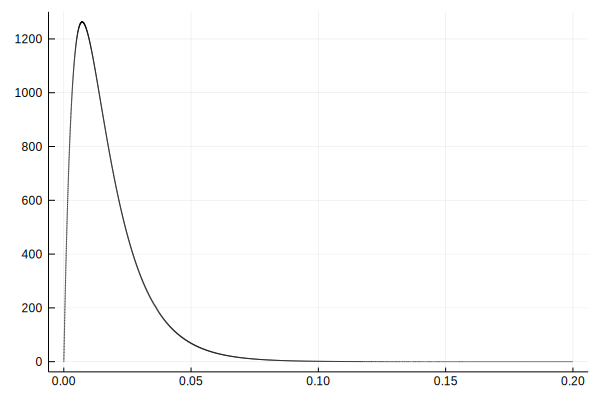

In [11]:
Xk_1 = [project(sol.Xk[i].X, [1], LazySets.LinearMap) for i in eachindex(sol.Xk)];

tiempos = [LazySets.Interval(sol.Xk[i].t_start, sol.Xk[i].t_end) for i in eachindex(sol.Xk)]

Xk_1t = [tiempos[i] × Xk_1[i] for i in eachindex(tiempos)];

plot(Xk_1t)

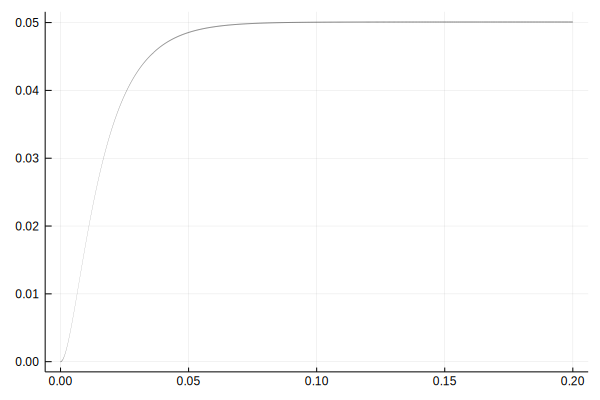

In [12]:
Xk_2 = [project(sol.Xk[i].X, [2], LazySets.LinearMap) for i in eachindex(sol.Xk)];

#tiempos = [LazySets.Interval(sol.Xk[i].t_start, sol.Xk[i].t_end) for i in eachindex(sol.Xk)]

Xk_2t = [tiempos[i] × Xk_2[i] for i in eachindex(tiempos)];

plot(Xk_2t)